In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from keras.models import Sequential, load_model
from keras.utils import np_utils,plot_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from sklearn import metrics
from keras import backend as K

In [2]:
# 定義
def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

In [7]:
train_dir='New_Rice_Dataset/train'
validation_dir='New_Rice_Dataset/validation'
train_dataset=tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    image_size=(160, 160),
    shuffle=True,
    seed=0,
    interpolation="bilinear"
)
val_dataset=tf.keras.preprocessing.image_dataset_from_directory(
    validation_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    image_size=(160, 160),
    shuffle=True,
    seed=0,
    interpolation="bilinear"
)

Found 1200 files belonging to 3 classes.
Found 150 files belonging to 3 classes.


In [8]:
from tensorflow.keras import layers
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), tf.cast(y, dtype=tf.int32)))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), tf.cast(y, dtype=tf.int32)))

In [10]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=3, input_shape=(160, 160, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=2))
model.add(Flatten())
model.add(Dropout(rate=0.2))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(3, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 160, 160, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 80, 80, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 80, 80, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 40, 40, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 40, 40, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 51200)             0

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc',precision, recall])
history = model.fit(train_dataset, validation_data=val_dataset, epochs=10, batch_size=512, verbose=1)

Epoch 1/10
38/38 [==============================] - 78s 2s/step - loss: 0.9253 - acc: 0.5908 - precision: 0.6346 - recall: 0.5016 - val_loss: 1.1652 - val_acc: 0.3800 - val_precision: 0.7714 - val_recall: 0.0716
Epoch 2/10
38/38 [==============================] - 73s 2s/step - loss: 0.6715 - acc: 0.7000 - precision: 0.7476 - recall: 0.6423 - val_loss: 2.6344 - val_acc: 0.3333 - val_precision: 0.3267 - val_recall: 0.3267
Epoch 3/10
38/38 [==============================] - 73s 2s/step - loss: 0.6454 - acc: 0.7325 - precision: 0.7634 - recall: 0.6965 - val_loss: 1.6829 - val_acc: 0.3333 - val_precision: 0.3352 - val_recall: 0.3352
Epoch 4/10
38/38 [==============================] - 73s 2s/step - loss: 0.5401 - acc: 0.7550 - precision: 0.7843 - recall: 0.7319 - val_loss: 1.2129 - val_acc: 0.3600 - val_precision: 0.4200 - val_recall: 0.3511
Epoch 5/10
38/38 [==============================] - 72s 2s/step - loss: 0.4198 - acc: 0.8233 - precision: 0.8399 - recall: 0.8018 - val_loss: 5.1872 - v

In [12]:
Test_dir='New_Rice_Dataset/test'
Test_dataset=tf.keras.preprocessing.image_dataset_from_directory(
    Test_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    image_size=(160, 160),
    shuffle=True,
    seed=0,
    interpolation="bilinear"
)

Found 150 files belonging to 3 classes.


In [13]:
loss, accuracy,precision_R, recall_R = model.evaluate(Test_dataset)
print('Loss:', loss)
print('Accuracy:', accuracy)
print('Precision:', precision_R)
print('Recall:', recall_R)
F1 = 2 * (precision_R * recall_R) / (precision_R + recall_R)
print('F1',F1)

5/5 [==============================] - 1s 142ms/step - loss: 6605.3218 - acc: 0.3333 - precision: 0.3295 - recall: 0.3295
Loss: 6605.32177734375
Accuracy: 0.3333333432674408
Precision: 0.32954543828964233
Recall: 0.32954543828964233
F1 0.32954543828964233


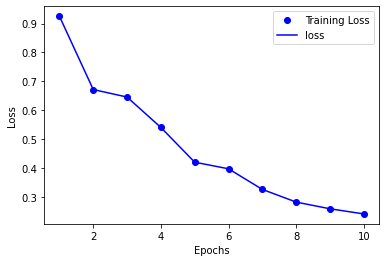

In [14]:
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, "bo", label ="Training Loss")
plt.plot(epochs, history.history['loss'], 'b', label='loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

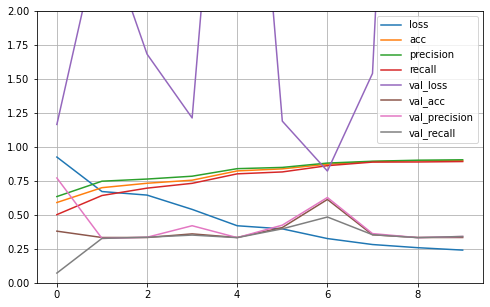

In [15]:
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

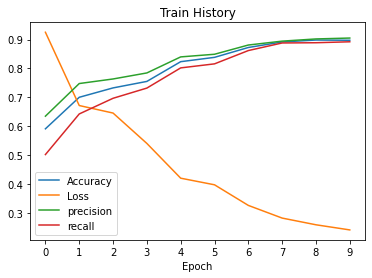

In [16]:
plt.plot(history.history["acc"])
plt.plot(history.history["loss"])
plt.plot(history.history["precision"])
plt.plot(history.history["recall"])
plt.title("Train History")
plt.xticks(np.arange(10),np.arange(10).astype(str))
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Loss","precision","recall"], loc="lower left")
plt.show()